In [2]:
train_df = pd.read_csv("../../data/datasets/default/20170416.csv")
train_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,degree_mean,degree_mean_shift1,degree_std,...,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var,var_shift1,vertical,prev_acc_cnt
0,0,0,0,1,0,0,0,125.666667,-27.054264,115.604553,...,0,0,0.333333,0.071429,0.119048,0.000000,22.5958,21.1866,0.000000,0
1,0,0,0,1,0,0,0,130.590909,4.924242,118.552504,...,0,0,0.295455,0.136364,0.113636,0.000000,26.3131,3.7173,0.022727,0
2,0,0,0,1,0,0,0,146.083333,15.492424,137.548855,...,0,0,0.361111,0.111111,0.222222,0.027778,27.2595,0.9464,0.027778,0
3,0,0,0,1,0,0,0,154.648649,8.565315,125.963362,...,0,0,0.324324,0.054054,0.189189,0.000000,26.6687,-0.5908,0.000000,0
4,0,0,0,1,0,0,0,118.275862,-36.372787,104.465436,...,0,0,0.241379,0.206897,0.068966,0.000000,33.2341,6.5654,0.000000,0


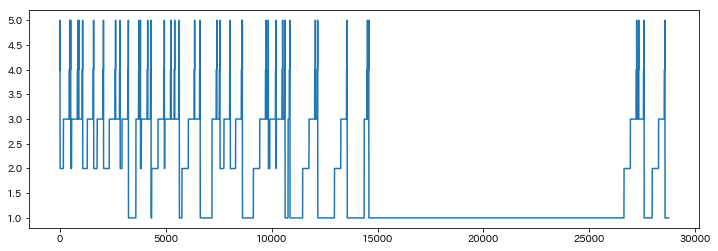

In [64]:
label_arr = np.array(train_df["label"])

plt.figure(figsize=(12, 4))
plt.plot(label_arr)
plt.savefig("./level?label.png")

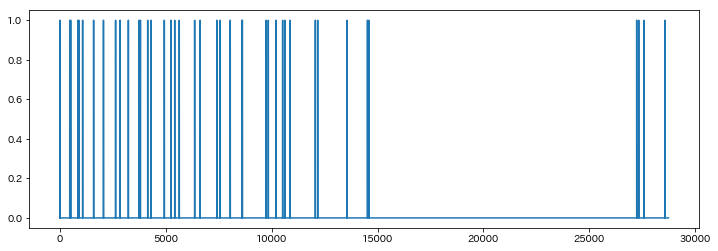

In [6]:
bin_label_arr = label_arr.copy()
bin_label_arr[bin_label_arr < 5] = 0
bin_label_arr[bin_label_arr == 5] = 1

plt.figure(figsize=(12, 4))
plt.plot(bin_label_arr)

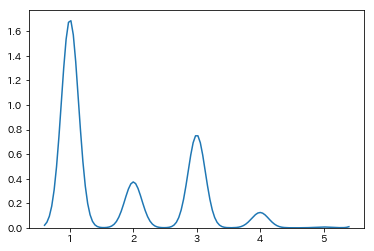

In [8]:
import seaborn as sns

sns.kdeplot(label_arr)

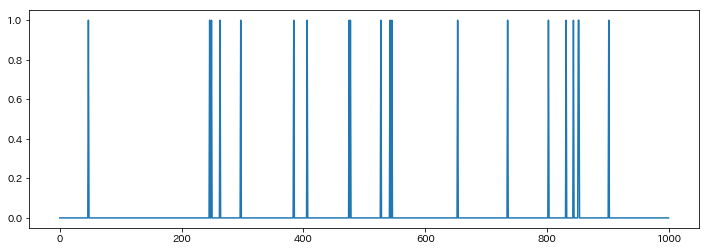

In [43]:
a = np.zeros(1000)
bin_index = np.random.randint(0, 1000, 20)

a[bin_index] = 1

plt.figure(figsize=(12, 4))
plt.plot(a)

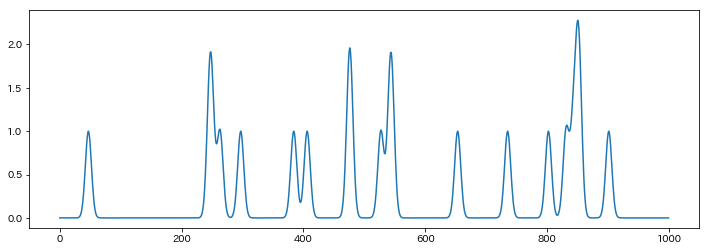

In [45]:
from scipy import stats

norm_label_arr = np.zeros(a.shape)
x = np.linspace(0, 999, num=1000)

for i in np.where(a == 1)[0]:
    norm = stats.norm.pdf(x, loc=i, scale=5)
    norm /= np.max(norm)
    norm_label_arr += norm

plt.figure(figsize=(12, 4))
plt.plot(x, norm_label_arr)

In [49]:
def norm_label(label_arr, kw=60):
    time_width = label_arr.shape[0]
    norm_label_arr = np.zeros(time_width)
    x = np.linspace(0, time_width-1, num=time_width)

    for i in np.where(label_arr == 1)[0]:
        norm = stats.norm.pdf(x, loc=i, scale=kw)
        norm /= np.max(norm)
        norm_label_arr += norm
        
    return norm_label_arr, x

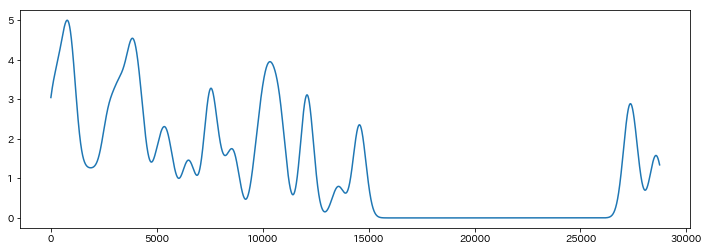

In [63]:
norm_label_arr, x = norm_label(bin_label_arr, kw=60*5)
norm_label_arr /= np.max(norm_label_arr)
norm_label_arr *= 5

plt.figure(figsize=(12, 4))
plt.plot(x, norm_label_arr)
plt.savefig("./gaussian_label.png")

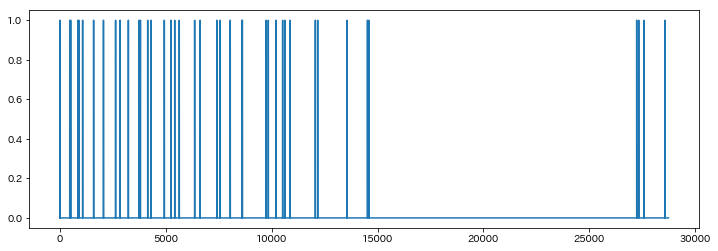

In [62]:
bin_label_arr = label_arr.copy()
bin_label_arr[bin_label_arr < 5] = 0
bin_label_arr[bin_label_arr == 5] = 1

plt.figure(figsize=(12, 4))
plt.plot(bin_label_arr)
plt.savefig("./label.png")

In [1]:
train_df = pd.read_csv("../../data/datasets/gaussian/20181029.csv")
train_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,degree_mean,degree_mean_shift1,degree_std,...,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var,var_shift1,vertical,prev_acc_cnt
0,0,1,0,0,0,0,0,153.567568,24.667568,132.435306,...,0,0,0.270270,0.135135,0.216216,0.00,21.6184,21.6184,0.00,0
1,0,1,0,0,0,0,0,97.413793,-56.153774,123.596540,...,0,0,0.586207,0.034483,0.103448,0.00,23.1687,1.5503,0.00,0
2,0,1,0,0,0,0,0,69.718750,-27.695043,94.583044,...,0,0,0.593750,0.062500,0.031250,0.00,22.9060,-0.2627,0.00,0
3,0,1,0,0,0,0,0,109.513514,39.794764,116.403683,...,0,0,0.432432,0.081081,0.081081,0.00,23.6988,0.7928,0.00,0
4,0,1,0,0,0,0,0,142.520000,33.006486,125.749313,...,0,0,0.360000,0.080000,0.120000,0.04,24.0124,0.3136,0.04,0


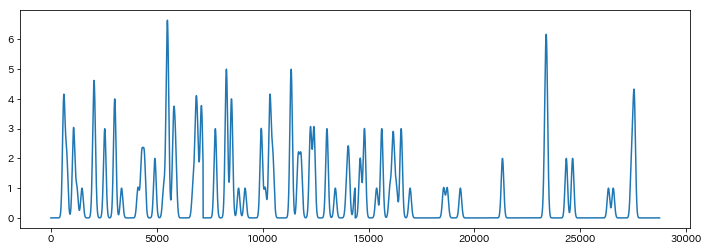

In [2]:
plt.figure(figsize=(12, 4))
plt.plot(list(train_df["label"]))